# Метод опорных векторов - Support Vector Machines
## Регрессия

Испытание на осадку бетона  измеряет консистенцию свежего бетона до его застывания. Это нужно для проверки качества свежего бетона, а также проверки того, насколько легко льётся бетон. Неудовлетворительные результаты могут быть признаком того, что бетон был неправильно замешан.


Наш набор данных состоит из различных характеристик бетона, а также из результатов испытаний на осадку, в сантиметрах. Позже, через 28 дней, затвердевший бетон проверяют на силу сжатия.

Входные переменные (7) (килограмм компонента на один кубический метр бетона):
* Цемент (Cement)
* Шлак (Slag)
* Летучая зола (Fly ash)
* Вода (Water)
* Суперпластификатор (SP)
* Крупный наполнитель (Coarse Aggr.)
* Мелкий наполнитель (Fine Aggr.)

Результирующие переменные (3):
* Осадка (SLUMP) (cm)
* Наплыв (FLOW) (cm)
* **Прочность на сжатие (compressive strength) через 28 дней (Mpa)**

Источник данных: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

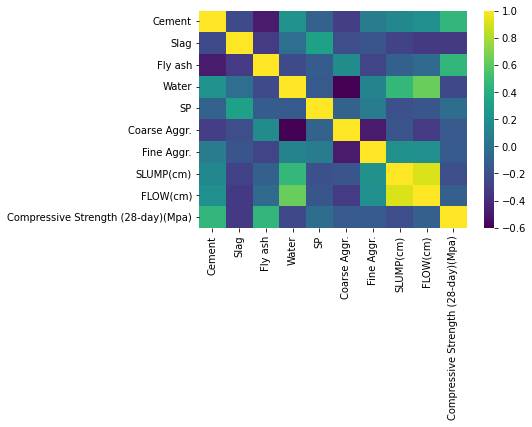

In [5]:
sns.heatmap(df.corr(),cmap='viridis')

In [6]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## Разбиение на обучающий и тестовый наборы данных


In [7]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Метод опорных векторов - регрессия

Существуют три разных реализации регрессии метода опорных векторов: SVR, NuSVR и LinearSVR. LinearSVR быстрее, чем SVR, но рассматривает только линейные ядра. Третий метод - NuSVR - реализует немного другой подход, чем SVR и LinearSVR. 

In [14]:
from sklearn.svm import SVR,LinearSVR

Устанавливаем значение C: по умолчанию значение C равно 1, в большинстве случаев это хорошее значение по умолчанию. Если  много шумных данных, то можно уменьшить это значение: уменьшение C соответствует большей регуляризации.

LinearSVC и LinearSVR менее чувствительны к большим значениям C, и результаты прогнозирования перестают улучшаться после некоторого порогового значения. В то же время, бОльшие значения C требуют больше времени на обучение модели, иногда до 10 раз больше времени.


In [15]:
base_model = SVR()

In [16]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [17]:
base_preds = base_model.predict(scaled_X_test)

## Оценка модели (Evaluation)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [20]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [21]:
y_test.mean()

36.26870967741935

## Поиск по сетке

In [22]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [25]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [26]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [27]:
grid_preds = grid.predict(scaled_X_test)

In [28]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [29]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347

Заметное улучшение!